# Исследование рынка видеоигр


Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Цель исследования:**
- Выявить определяющие успешность игры закономерности
- Определить популярный продукт и спланировать рекламные компании на 2017 год

**Ход исследования:**
- Изучения общей информации датасета
- Поиск и замена пропущенных значений, изменение типа данных, поиск и обработка аномалий 
- Проведение исследовательского анализа
- Составить портрет пользователя каждого региона 
- Проверить гипотезы


# Описание данных

`Name` — название игры

`Platform` — платформа

`Year_of_Release` — год выпуска

`Genre` — жанр игры

`NA_sales` — продажи в Северной Америке (миллионы проданных копий)

`EU_sales` — продажи в Европе (миллионы проданных копий)

`JP_sales` — продажи в Японии (миллионы проданных копий)

`Other_sales` — продажи в других странах (миллионы проданных копий)

`Critic_Score` — оценка критиков (максимум 100)

`User_Score` — оценка пользователей (максимум 10)

`Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Откроем файл с данными и изучим общую информацию

In [1]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import warnings
import scipy.stats as st
import seaborn as sb

In [2]:
try:
    df = pd.read_csv('/datasets/games.csv') # использовали табуляцию, так как данные склеились
except:
    df = pd.read_csv(r'C:\Users\niksmns\Desktop\video_game_market_research/games.csv')

In [3]:
def general_info(data):
    display(data.head(10))
    display(data.info())
    display(pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm'))
    display('Количество дубликатов:', data.duplicated().sum())
    display(data.columns)
    display(data.describe())

In [4]:
general_info(df)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

,0
Name,0.000000
Platform,0.000000
Year_of_Release,2.000000
Genre,0.000000
NA_sales,0.000000
EU_sales,0.000000
JP_sales,0.000000
Other_sales,0.000000
Critic_Score,51.000000
User_Score,40.000000


'Количество дубликатов:'

0

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [5]:
# просмотрим возрастной рейтинг игр, чтобы ориентироваться 
df['Rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: Rating, dtype: int64

- **«EC» («Early childhood»)** — «Для детей младшего возраста»: Игра подходит для детей от 3 лет и не содержит материалов, которые родители могли бы счесть неподходящими. Продукты, получившие данный рейтинг, изначально разрабатываются для детей и обычно представляют собой развивающие игры.

- **«E» («Everyone»)** — «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет. Такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера

- **«E10+» («Everyone 10 and older»)** — «Для всех от 10 лет и старше»: Проекты с данным рейтингом могут содержать или немного больше мультипликационного или мягкого насилия, или несколько откровенные сцены, или минимальное количество крови

- **«T» («Teen»)** — «Подросткам»: Игра подходит для лиц от 13 лет. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики

- **«M» («Mature»)** — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет. Проекты с данным рейтингом могут содержать достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику, нежелательную для младшей аудитории

- **«AO» («Adults Only 18+»)** — «Только для взрослых»: Содержание игры только для взрослых старше 18 лет. Продукты из данной категории могут содержать длительные сцены жестокого насилия и/или очень откровенное сексуальное содержимое, а также сцены с обнажением

- **RP» («Rating Pending»)** — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга. Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официальной даты выпуска в продажу

- **«K-A» («Kids to Adults»)** - это рейтинг «Для всех» который был до 1997 года, далее ему изменили название на «E» («Everyone»)

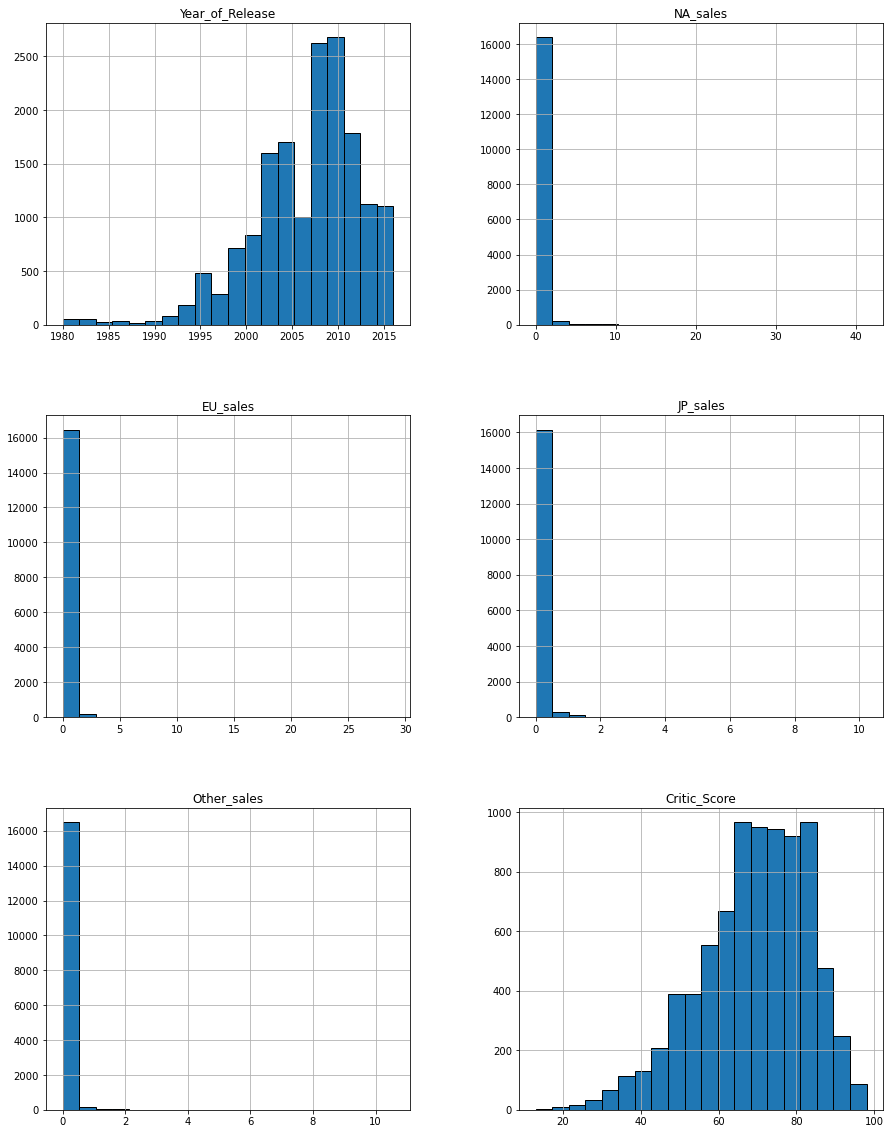

In [6]:
df.hist(bins=20, figsize=(15, 20), ec='black')
plt.show()

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px">

В ходе просмотра данных наблюдаем, что в данных имеется много пропусков в колонках рейтинга, вероятно это ошибка ввода данных, либо специфика подсчета рейтинга и недостаточности оценок для выявления рейтинга

Явных дубликатов не обнаружено, есть необходимость поменять тип данных, привести колонки к нижнему регистру
</div>

## Проведём предобработку данных

### Приведём к нижнему регистру название колонок

In [7]:
# приводим к нижнему регистру 
df.columns = df.columns.str.lower()

In [8]:
# проверяем изменения
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Обработка пропусков, типов данных

In [9]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [10]:
# удаляем пропуски в дате релиза, так как они занимают всего 2% от данных и не повлечет за собой последствий 
df.dropna(subset=['year_of_release'], inplace=True)

In [11]:
# удаляем пропуски в данных колонках, данных совсем несущественно
df.dropna(subset=['name'], inplace=True)
df.dropna(subset=['genre'], inplace=True)

In [12]:
len(df.query('user_score == "tbd"'))

2376

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px">

Получилось `2376` значений tbd. TBD(To Be Determined) - будет определенно. Означает, что оценки этих игр не набрали минимальное количество оценок для подсчёта рейтинга
</div>

In [13]:
tbd = (
    df.query('user_score == "tbd"')
    .pivot_table(index='user_score', values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'],
                 aggfunc='median')
)

In [14]:
display(tbd)

,eu_sales,jp_sales,na_sales,other_sales
user_score,,,,
tbd,0.01,0.0,0.07,0.01


<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px">

Видим, что доля продаж очень низкая по всем рынкам, вероятно эти игры не пользуются особой популярностью, либо отзывов на эти игры мало, поэтому можем заполнить эти значения "0" - это будет означать отсутствие рейтинга
</div>

In [15]:
# меняем значение
df.loc[df['user_score'] == 'tbd', 'user_score'] = 0

In [16]:
# проверяем
len(df.query('user_score == "tbd"'))

0

In [17]:
# выводим данные с пропусками
df[df['user_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px">

По этим данным можно сказать, что нет рейтинга у многих старых, непопулярных и недавно вышедших игр

Эти пропуски можно заполнить 0 - это будет значить отсутствие рейтинга
</div>

In [18]:
# заполняем пропуски
df['critic_score'] = df['critic_score'].fillna(0)
df['user_score'] = df['user_score'].fillna(0).astype('float')
df['rating'] = df['rating'].fillna('Рейтинг отсутствует')

### Сумарные продажи

In [19]:
# создаем колонку общих продаж
df['all_sales'] = df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [20]:
# проверяем
df.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,0.0,0.0,Рейтинг отсутствует,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,Рейтинг отсутствует,31.38


<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px">

- Основные пропуски приходились на колонки critic_score, user_score, rating, вероятной причиной послужило, что у 
этих игр нет рейтинга из-за того, что они старые, непопулярные, либо недавно вышедшие

- Эти пропуски можно было бы и не трогать, но я считаю, что будет удобно, так как будем работать с числами - заполнить пропуски «0», что означает нет рейтинга. Также помеяли TBD на «0»

- Значения rating «Рейтинг отсутствует» я оставлю в покое, так как они понадобятся дальше для анализа

- Создали новую колонку сумарных продаж игр по всем рынкам
</div>

## Исследовательский анализ

### Выпуск игр в разные годы

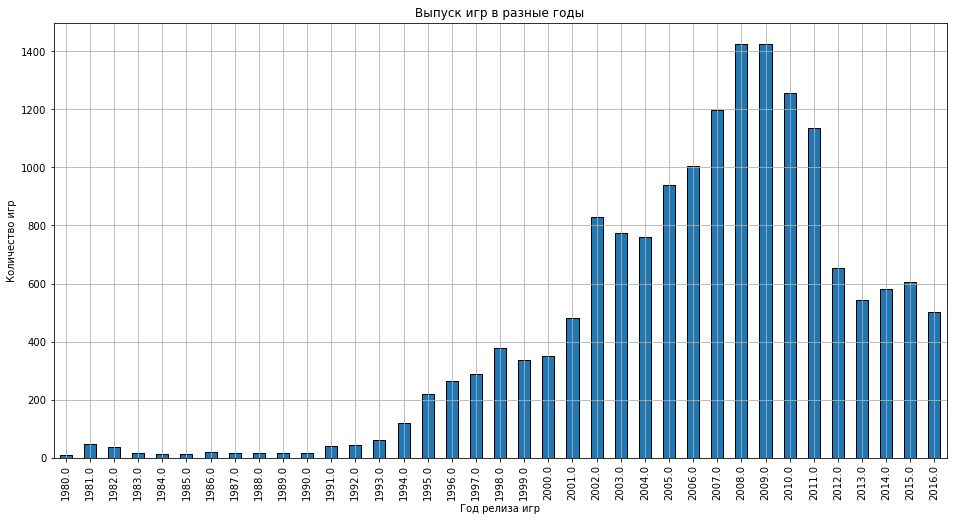

In [21]:
# создадим сводную таблицу и выведим столбчатую диаграмму 
(
    df.pivot_table(index='year_of_release', values='name', aggfunc='count')
    .plot(kind='bar', grid=True, figsize=(16, 8), legend=False, ec='black')
)
plt.title('Выпуск игр в разные годы')
plt.xlabel('Год релиза игр')
plt.ylabel('Количество игр')
plt.show()

**Считаю, что можно взять данные для следующего анализа за последние 10 лет, так как в 2005-2006 гг. открылась эпоха игр с высоким разрешением**

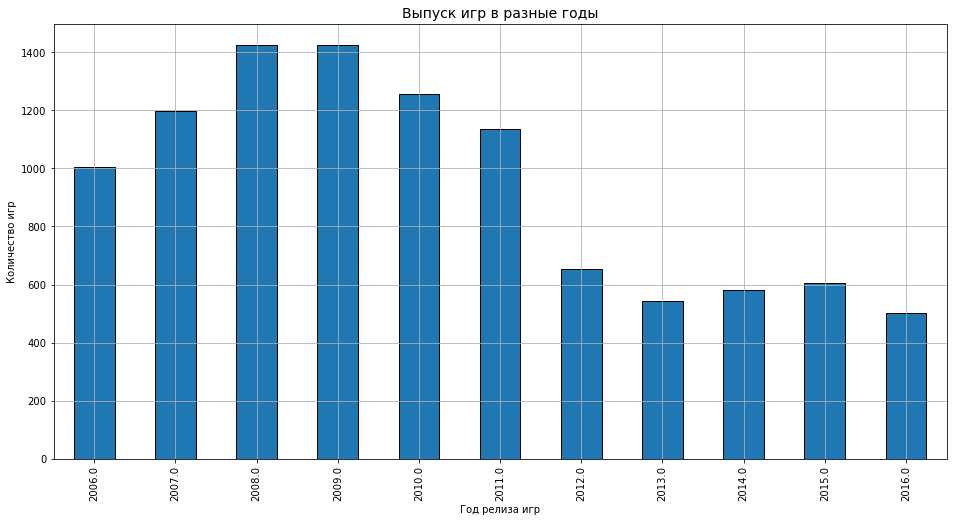

In [22]:
# создадим сводную таблицу из среза и выведим столбчатую диаграмму 
(
    df.query('year_of_release >= 2006')
    .pivot_table(index='year_of_release', values='name', aggfunc='count')
    .plot(kind='bar', grid=True, figsize=(16, 8), legend=False, ec='black')
)
plt.title('Выпуск игр в разные годы', size=14)
plt.xlabel('Год релиза игр')
plt.ylabel('Количество игр')
plt.show()

### Продажи по платформам

In [23]:
# создадим переменную platform_sales и передадим ей сводную таблицу с сортировой по убыванию
platform_sales = (
    df.pivot_table(index='platform', values='all_sales', aggfunc='sum')
    .sort_values(by='all_sales', ascending=False)
)
display(platform_sales)

,all_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


In [24]:
platform_sales = platform_sales.query('all_sales > 50')

In [25]:
most_platform_sales = df.query('platform in @platform_sales.index')

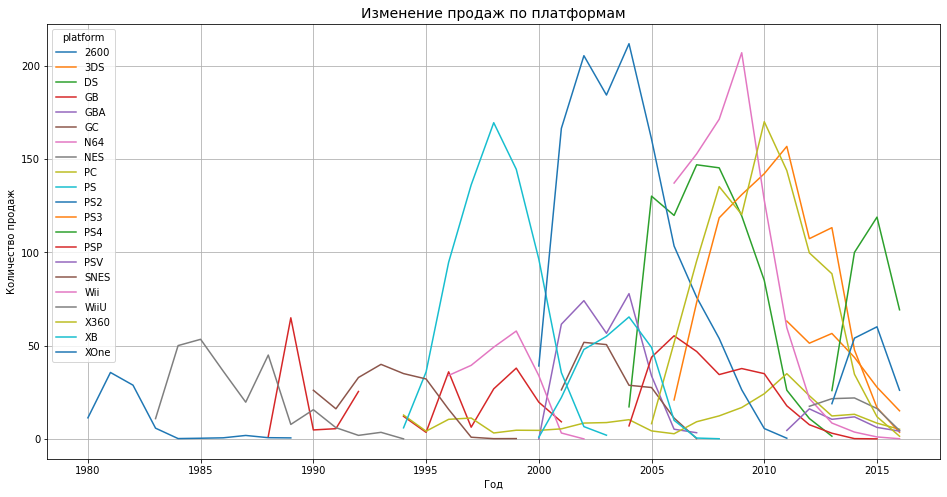

In [26]:
(
    most_platform_sales.pivot_table(index='year_of_release', columns='platform', values='all_sales', aggfunc='sum')
    .plot(grid=True, figsize=(16, 8))
)
plt.title('Изменение продаж по платформам', size=14)
plt.xlabel('Год')
plt.ylabel('Количество продаж')
plt.show()

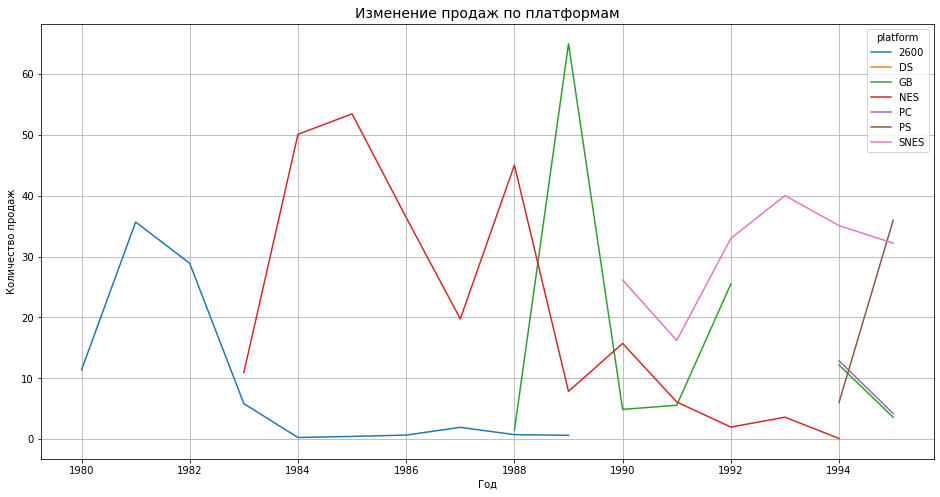

In [27]:
(
    most_platform_sales.query('year_of_release <= 1995')
    .pivot_table(index='year_of_release', columns='platform', values='all_sales', aggfunc='sum')
    .plot(grid=True, figsize=(16, 8))
)
plt.title('Изменение продаж по платформам', size=14)
plt.xlabel('Год')
plt.ylabel('Количество продаж')
plt.show()

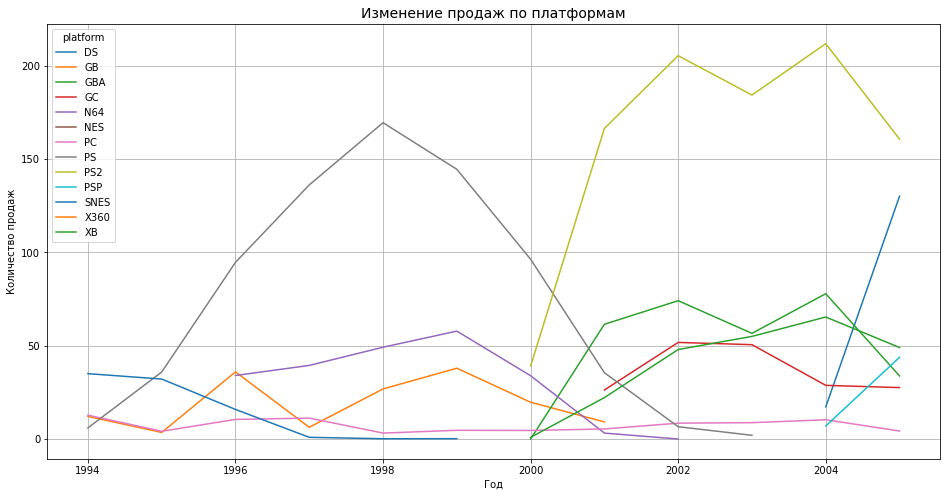

In [28]:
(
    most_platform_sales.query('1994 <= year_of_release <= 2005')
    .pivot_table(index='year_of_release', columns='platform', values='all_sales', aggfunc='sum')
    .plot(grid=True, figsize=(16, 8))
)
plt.title('Изменение продаж по платформам', size=14)
plt.xlabel('Год')
plt.ylabel('Количество продаж')
plt.show()

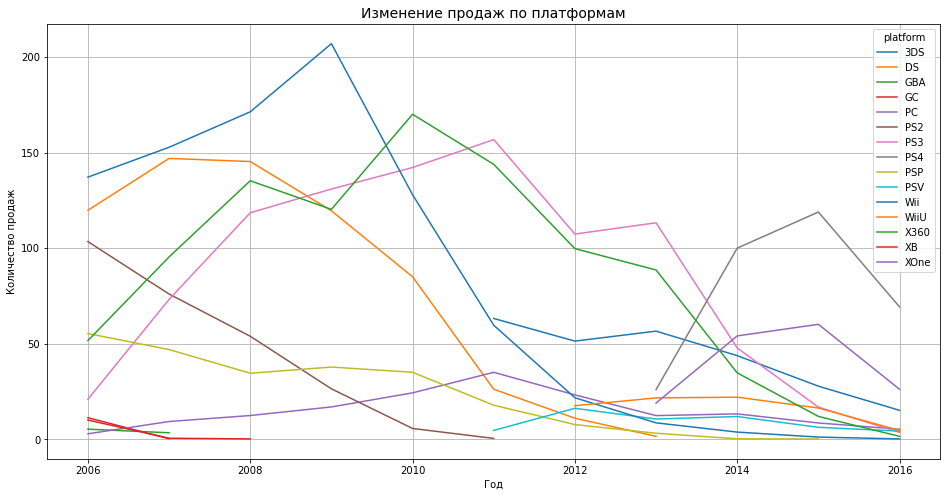

In [29]:
(
    most_platform_sales.query('year_of_release > 2005')
    .pivot_table(index='year_of_release', columns='platform', values='all_sales', aggfunc='sum')
    .plot(grid=True, figsize=(16, 8))
)
plt.title('Изменение продаж по платформам', size=14)
plt.xlabel('Год')
plt.ylabel('Количество продаж')
plt.show()

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px">

На графиках мы видим, что платформы живут в среднем от 8 до 12 лет. На последнем графике видно, что многие платформы идут на спад продаж, появляются консоли нового поколения начиная с 2011 года. Прорывом становятся PS4 и XOne. На PC продажи идут плавно всё время и резких обьёмов нет, вероятно это свяазано с пиратством

Считаю, что наиболее актуальный период для прогноза 2017 года будет с 2014 года, так как новые платформы уже набрали необходимые данные продаж для анализа
</div>

In [30]:
# сохраняем актуальные данные в переменной для будущего анализа
current_period = most_platform_sales.query('year_of_release >= 2014')

### Потенциально прибыльные платформы 

In [31]:
# просмотрим потенциально прибыльные платформы
(
    current_period.pivot_table(index='platform', values='all_sales', aggfunc='sum')
    .sort_values(by='all_sales', ascending=False)
)

,all_sales
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22
WiiU,42.98
PC,27.05
PSV,22.40
Wii,5.07


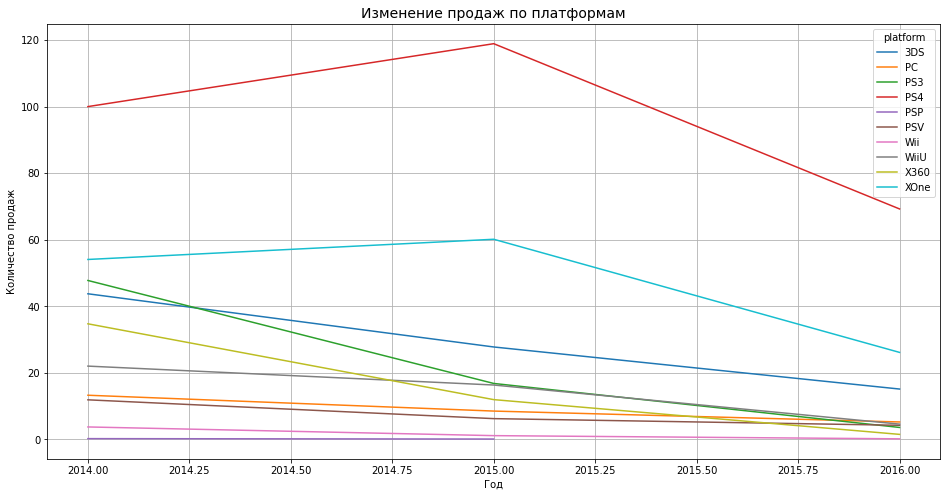

In [32]:
(
    current_period.query('year_of_release >= 2014')
    .pivot_table(index='year_of_release', columns='platform', values='all_sales', aggfunc='sum')
    .plot(grid=True, figsize=(16, 8))
)
plt.title('Изменение продаж по платформам', size=14)
plt.xlabel('Год')
plt.ylabel('Количество продаж')
plt.show()

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px">

- Тройкой лидеров по продажам являются PS4, XOne, 3DS

- До 2015 рост продаж наблюдается только у PS4 и XOne, так как они вышли относительно недавно, возможно они даже достигнули своего пика в этом году

- Далее можем заметить по графику, что в 2015 году эти платформы пошли на спад, остальные же продолжили падать в продажах, а PSP вовсе себя изжил
</div>

In [33]:
filter_current_period = current_period.query('platform == ["PS4", "XOne", "3DS"]')

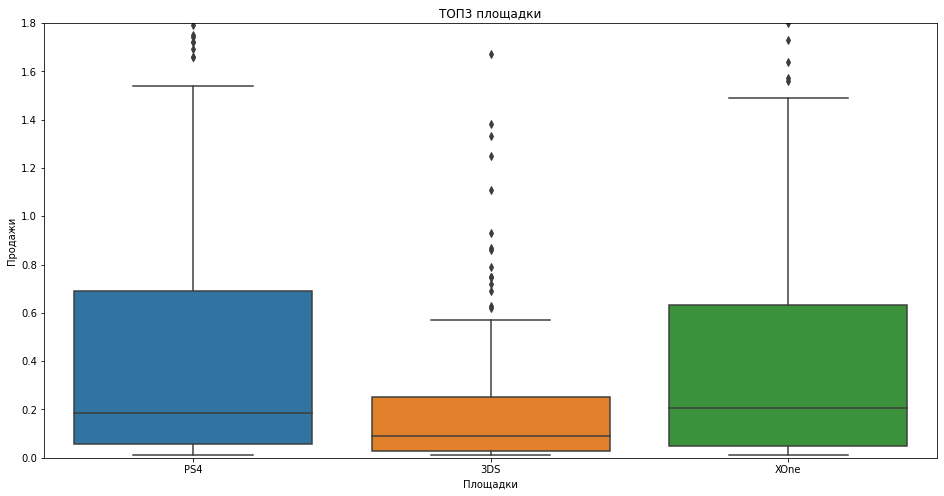

In [34]:
plt.figure(figsize=(16,8))
sb.boxplot(x='platform', y='all_sales', data=filter_current_period).set(ylim=(0, 1.8),
                                                                       title='ТОП3 площадки',
                                                                       xlabel='Площадки',
                                                                       ylabel='Продажи')
plt.show()

In [35]:
filter_current_period.pivot_table(index='platform', values='all_sales', aggfunc=['mean', 'median', 'count'])

,mean,median,count
,all_sales,all_sales,all_sales
platform,,,
3DS,0.408868,0.090,212
PS4,0.766356,0.185,376
XOne,0.615614,0.205,228


<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px">

На графике видим, что у PS4 немногим больше средние продажи, чем у XOne. Большее количество продаж игр на PS4 можно обьяснить выпуском экслюзивов на этой платформе, а у XOne имеет свои преимущества в виде своих эксклюзивов и возможностью запуска игр для XBox 360. 3DS же совсем иной конкурент, ибо это портативная платформа, ее можно носить с собой везде. У неё нет таких мощностей, но для любителей старых добрых игр не в высоком разрешение - это возможность понастальгировать и подходит для детей малых лет
</div>

### Влияние на продажи внутри одной популярной платформы отзывов пользователей и критиков

In [36]:
# создадим переменную для платформы PS4 и сделаем срез для дальнейший работы с ним
corr_ps4 = current_period.query('platform == "PS4"')[['critic_score', 'user_score', 'all_sales']]

In [37]:
# выведем табличную корреляцию
display(corr_ps4.corr())

,critic_score,user_score,all_sales
critic_score,1.000000,0.903670,0.211837
user_score,0.903670,1.000000,0.101448
all_sales,0.211837,0.101448,1.000000


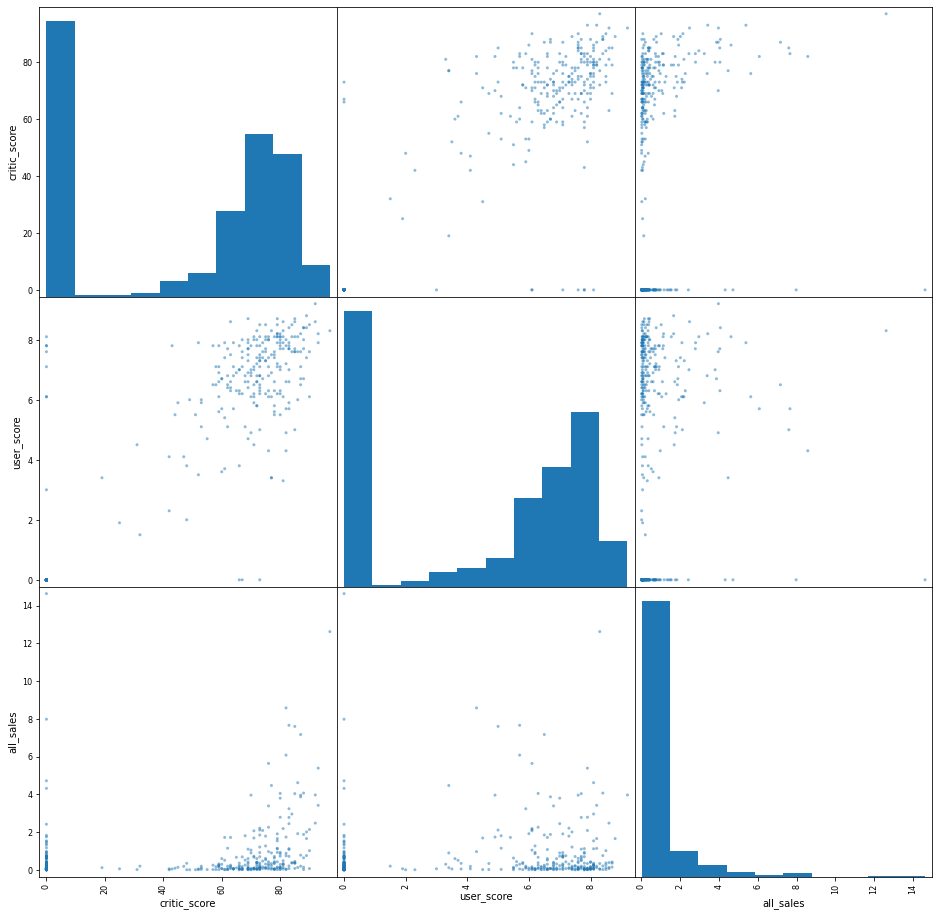

In [38]:
# выведем диаграмму рассеяния 
pd.plotting.scatter_matrix(corr_ps4, figsize=(16, 16), grid=True)    
plt.show()

**Видим, что есть корреляция между оценкой критиков и оценкой пользователей. Влияние оценок на количество продаж особо не наблюдается**

### Соотношение выводов с продаж игр на других платформах

In [39]:
corr_xone = current_period.query('platform == "XOne"')[['critic_score', 'user_score', 'all_sales']]

In [40]:
display(corr_xone.corr())

,critic_score,user_score,all_sales
critic_score,1.000000,0.793371,0.272518
user_score,0.793371,1.000000,0.102074
all_sales,0.272518,0.102074,1.000000


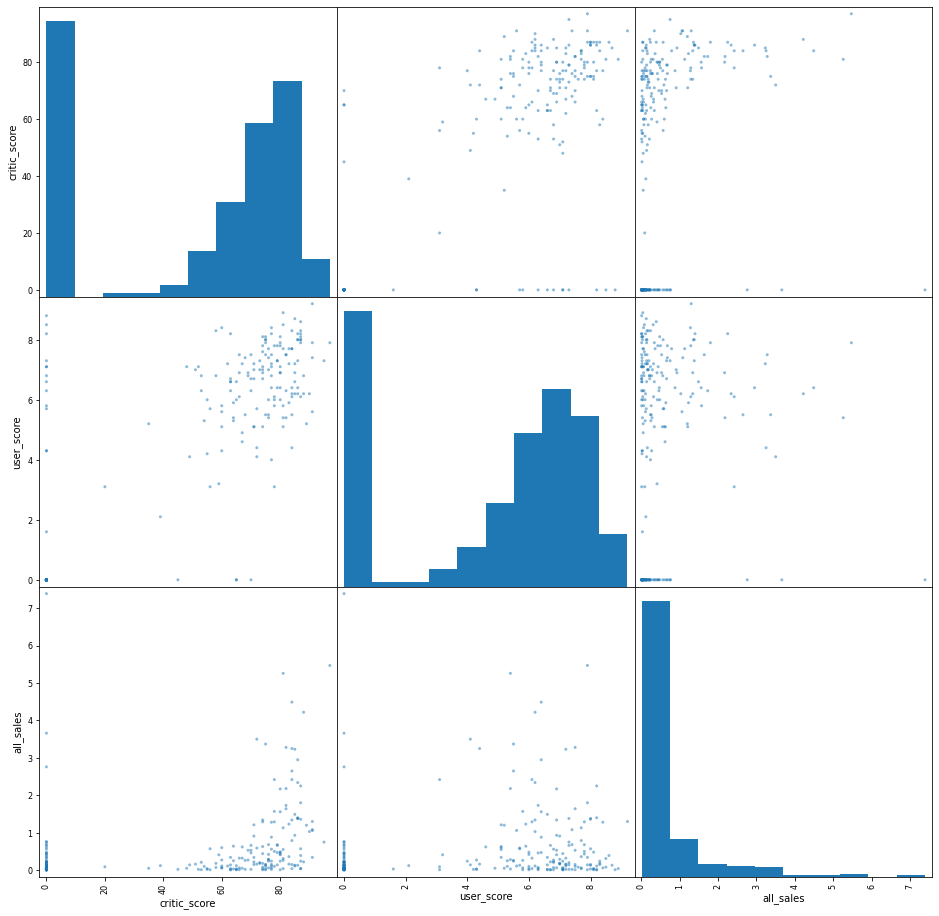

In [41]:
pd.plotting.scatter_matrix(corr_xone, figsize=(16, 16), grid=True)    
plt.show()

In [42]:
corr_3ds = current_period.query('platform == "3DS"')[['critic_score', 'user_score', 'all_sales']]

In [43]:
display(corr_3ds.corr())

,critic_score,user_score,all_sales
critic_score,1.000000,0.887491,0.053255
user_score,0.887491,1.000000,0.054922
all_sales,0.053255,0.054922,1.000000


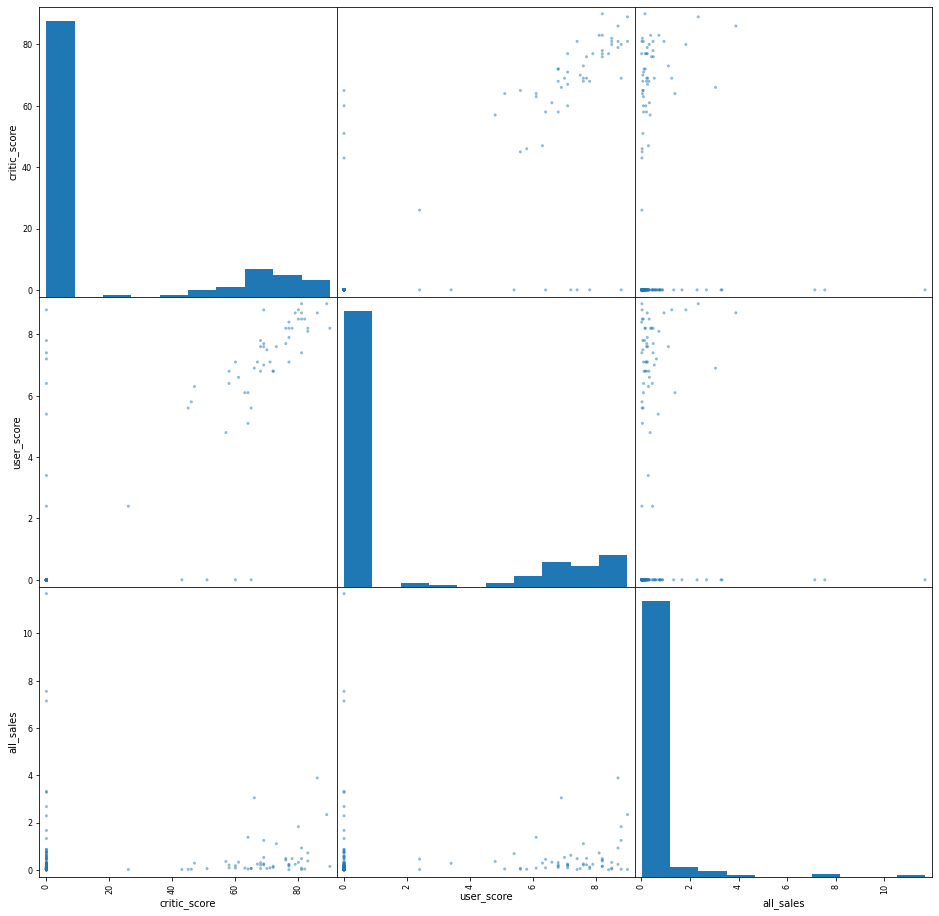

In [44]:
pd.plotting.scatter_matrix(corr_3ds, figsize=(16, 16), grid=True)    
plt.show()

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px">

По этим данных видим аналогичные выводы, что корреляциона зависимость оценки критиков и оценки пользователей достаточно высока, но зависимости количества продаж от рейтингов очень маленькие
</div>

### Общее распраделение по жанрам. Прибыльные жанры

In [45]:
# просмотрим самые популярные жанры
current_period['genre'].value_counts()

Action          619
Role-Playing    221
Adventure       185
Sports          161
Shooter         128
Misc            113
Racing           69
Fighting         60
Simulation       44
Platform         38
Strategy         37
Puzzle           14
Name: genre, dtype: int64

In [46]:
distribution_genre = current_period.pivot_table(index='genre', values='all_sales', aggfunc=['count', 'sum', 'mean', 'median'])
distribution_genre.columns = ['Количество игр', 'Продажи копий млн.', 'Среднее кол-во продаж', 'Медианное кол-во продаж']
display(distribution_genre.sort_values(by='Продажи копий млн.', ascending=False))

,Количество игр,Продажи копий млн.,Среднее кол-во продаж,Медианное кол-во продаж
genre,,,,
Action,619,199.36,0.322068,0.090
Shooter,128,170.94,1.335469,0.515
Sports,161,109.48,0.680000,0.180
Role-Playing,221,101.44,0.459005,0.110
Misc,113,37.55,0.332301,0.090
Fighting,60,28.22,0.470333,0.125
Racing,69,27.52,0.398841,0.090
Platform,38,18.09,0.476053,0.140
Adventure,185,17.55,0.094865,0.030


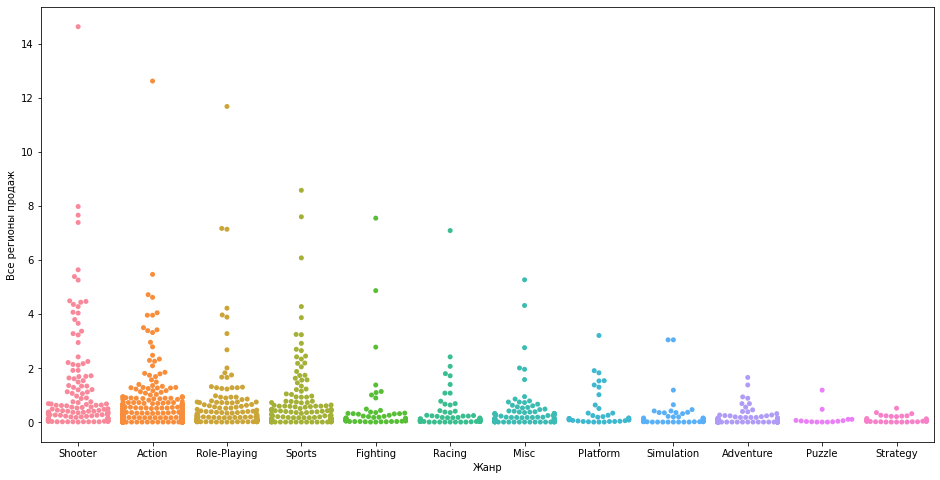

In [77]:
with warnings.catch_warnings():# воспользуемся библиотекой warnings, чтобы убрать сообщения об ошибках
    warnings.simplefilter("ignore", category=UserWarning)
    plt.figure(figsize=(16,8)) 
    sb.swarmplot(y='all_sales', x='genre', data=current_period) # воспользуемся категориальной точечной диаграммой
    plt.title('График распределения продаж по жанрам')
    plt.xlabel('Жанр')
    plt.ylabel('Все продажи')
    plt.show() 

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px">

- Из данных по сводной таблице и граффику, можем сказать, что жанры с самым высоким доходом являются shooter, action, role-playing и sports

- Самыми прибыльным жанром является шутер. Игр этого жанра не так много, как экшн, но это не мешает ему иметь высокие продажи, как мы видим это по медиане и среднему значению

- Далее список прибыльных игр состовляют такие жанры: sports, platform, fighting, role-playing и simulation

- Самые низкие продажи у таких жанров: adventure, puzzle и strategy
</div>

## Портрет пользователя каждого региона(NA, EU, JP)

### Самые популярные платформы(TOP5)

#### Северная Америка

In [48]:
platform_na = current_period.pivot_table(index='platform', values='na_sales', aggfunc=['count', 'sum'])
platform_na.columns = ['Количество игр', 'Продажи копий млн.']
display(platform_na.sort_values(by='Продажи копий млн.', ascending=False).head(5))

,Количество игр,Продажи копий млн.
platform,,
PS4,376,98.61
XOne,228,81.27
X360,111,28.30
3DS,212,22.64
PS3,219,22.05


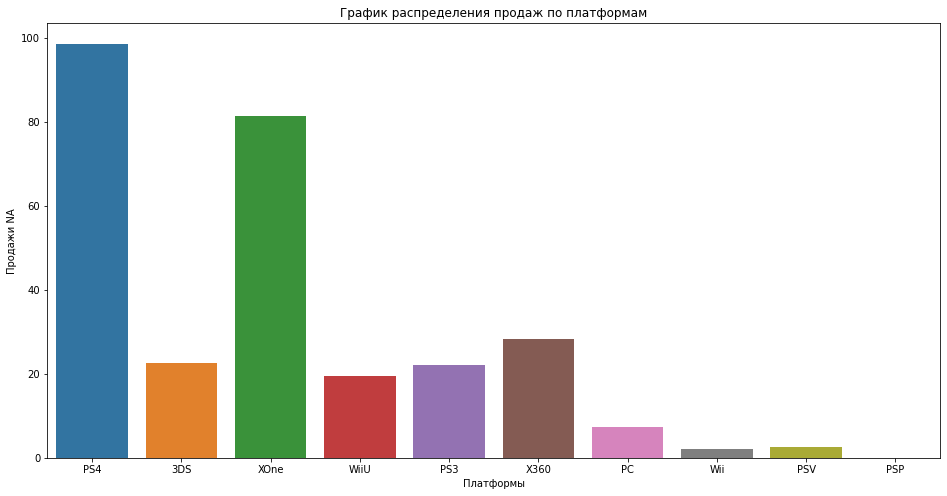

In [80]:
plt.figure(figsize=(16,8)) 
sb.barplot(y='na_sales', x='platform', ci = None, estimator=sum, data=current_period)
plt.title('График распределения продаж по платформам NA региона')
plt.xlabel('Платформа')
plt.ylabel('Продажи NA')
plt.show() 

#### Европа

In [50]:
platform_eu = current_period.pivot_table(index='platform', values='eu_sales', aggfunc=['count', 'sum'])
platform_eu.columns = ['Количество игр', 'Продажи копий млн.']
display(platform_eu.sort_values(by='Продажи копий млн.', ascending=False).head(5))

,Количество игр,Продажи копий млн.
platform,,
PS4,376,130.04
XOne,228,46.25
PS3,219,25.54
PC,151,17.97
3DS,212,16.12


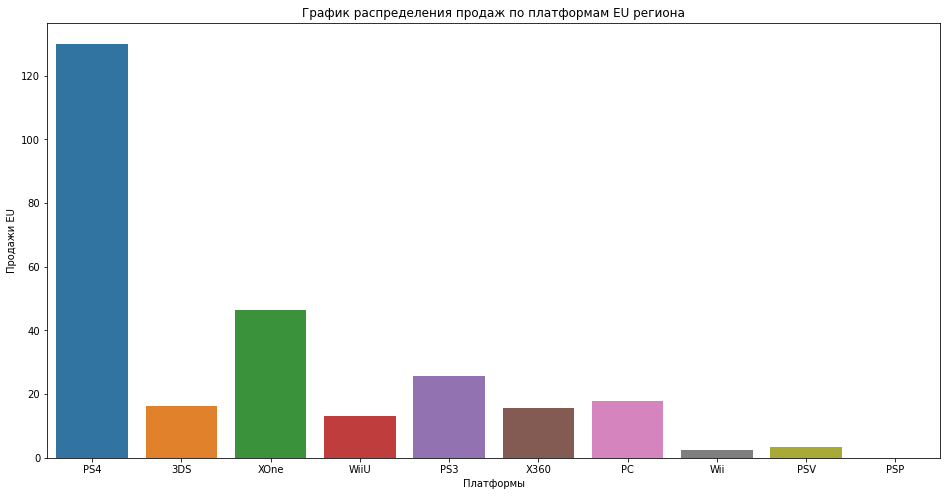

In [81]:
plt.figure(figsize=(16,8)) 
sb.barplot(y='eu_sales', x='platform', ci = None, estimator=sum, data=current_period)
plt.title('График распределения продаж по платформам EU региона')
plt.xlabel('Платформа')
plt.ylabel('Продажи EU')
plt.show() 

#### Япония

In [52]:
platform_jp = current_period.pivot_table(index='platform', values='jp_sales', aggfunc=['count', 'sum'])
platform_jp.columns = ['Количество игр', 'Продажи копий млн.']
display(platform_jp.sort_values(by='Продажи копий млн.', ascending=False).head(5))

,Количество игр,Продажи копий млн.
platform,,
3DS,212,44.24
PS4,376,15.02
PSV,295,14.54
PS3,219,11.22
WiiU,73,7.31


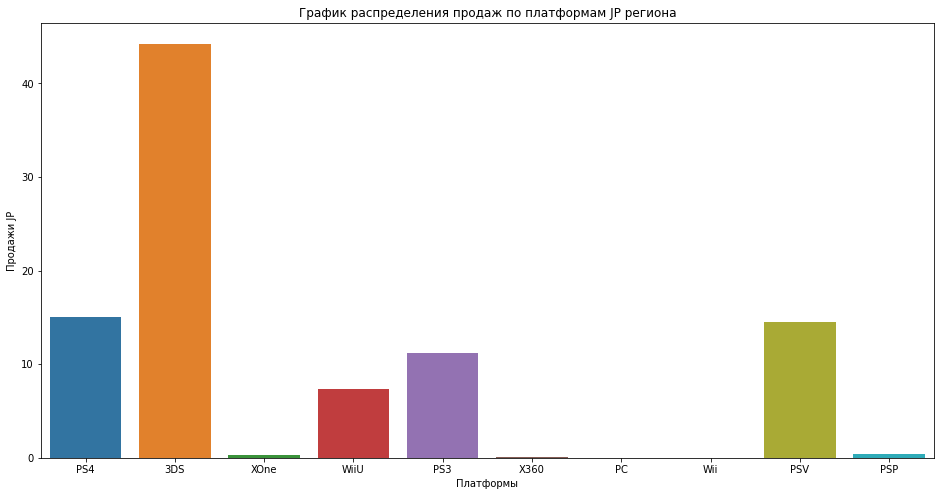

In [82]:
plt.figure(figsize=(16,8)) 
sb.barplot(y='jp_sales', x='platform', ci = None, estimator=sum, data=current_period)
plt.title('График распределения продаж по платформам JP региона')
plt.xlabel('Платформа')
plt.ylabel('Продажи JP')
plt.show() 

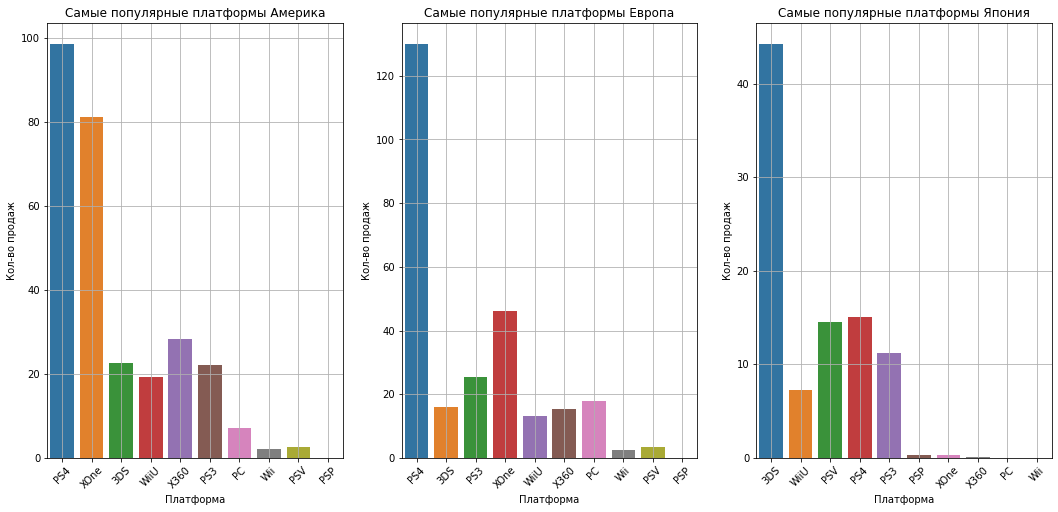

In [54]:
fig, axs = plt.subplots(1, 3, figsize=(18, 8))
sb.barplot(y='na_sales', x='platform', ci = None, estimator=sum, 
           data=current_period.sort_values(by='na_sales', ascending=False), ax=axs[0])
axs[0].set_title('Самые популярные платформы Америка')
axs[0].set_xlabel('Платформа')
axs[0].set_ylabel('Кол-во продаж')
axs[0].grid()
axs[0].tick_params(axis='x', rotation=45)
sb.barplot(y='eu_sales', x='platform', ci = None, estimator=sum, 
           data=current_period.sort_values(by='eu_sales', ascending=False), ax=axs[1])
axs[1].set_title('Самые популярные платформы Европа')
axs[1].set_xlabel('Платформа')
axs[1].set_ylabel('Кол-во продаж')
axs[1].grid()
axs[1].tick_params(axis='x', rotation=45)
sb.barplot(y='jp_sales', x='platform', ci = None, estimator=sum, 
           data=current_period.sort_values(by='jp_sales', ascending=False), ax=axs[2])
axs[2].set_xlabel('Платформа')
axs[2].set_ylabel('Кол-во продаж')
axs[2].set_title('Самые популярные платформы Япония')
axs[2].grid()
axs[2].tick_params(axis='x', rotation=45)
plt.show()

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px">

 **ТОП 5 самых популярных платформ в Америке:** 
1. PS4 - 98.61 млн. проданных копий
2. XOne - 81.27 млн. проданных копий
3. X360 - 28.30 млн. проданных копий
4. 3DS - 22.64 млн. проданных копий
5. PS3 - 22.05 млн. проданных копий

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px">    
Видим, очень больщой перевес на рынке с выходом новых консолей, но и не все спешат избавляться от консолей прошлого поколения, которое занимает значительное количество продаж
</div>
    
 **ТОП 5 самых популярных платформ в Европе:**
1. PS4 - 130.04 млн. проданных копий
2. XOne - 46.25 млн. проданных копий
3. PS3 - 25.24 млн. проданных копий
4. PC - 17.97 млн. проданных копий
5. 3DS - 16.12 млн. проданных копий

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px"> 
На Европейском рынке у нас совсем другие тенденции, PS4 занимает огромную часть рынка, но в отличии от Америки, здесь меньше приобретают XOne. Также видим, что на Европейском рынке популярен PC, а 3DS немногим меньше в NA
</div>

 **ТОП 5 самых популярных платформ в Японии:**
1. 3DS - 44.24 млн. проданных копий
2. PS4 - 15.02 млн. проданных копий
3. PSV - 14.54 млн. проданных копий
4. PS3 - 11.22 млн. проданных копий
5. WiiU - 7.31 млн. проданных копий
    
<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px"> 

Японский рынок оказался интересным в плане поддержки отечественных консолей, ибо Sony и Nintendo - японские компании.
Также видно, что японцы предпочитают портативные консоли больше, чем стационарные, возможно это связано с высоким темпом жизни в этой стране
</div>
</div>

### Самые популярные жанры(TOP5)

#### Америка

In [55]:
genre_na = current_period.pivot_table(index='genre', values='na_sales', aggfunc=['count', 'sum'])
genre_na.columns = ['Количество игр', 'Продажи копий млн.']
display(genre_na.sort_values(by='Продажи копий млн.', ascending=False).head(5))

,Количество игр,Продажи копий млн.
genre,,
Shooter,128,79.02
Action,619,72.53
Sports,161,46.13
Role-Playing,221,33.47
Misc,113,15.05


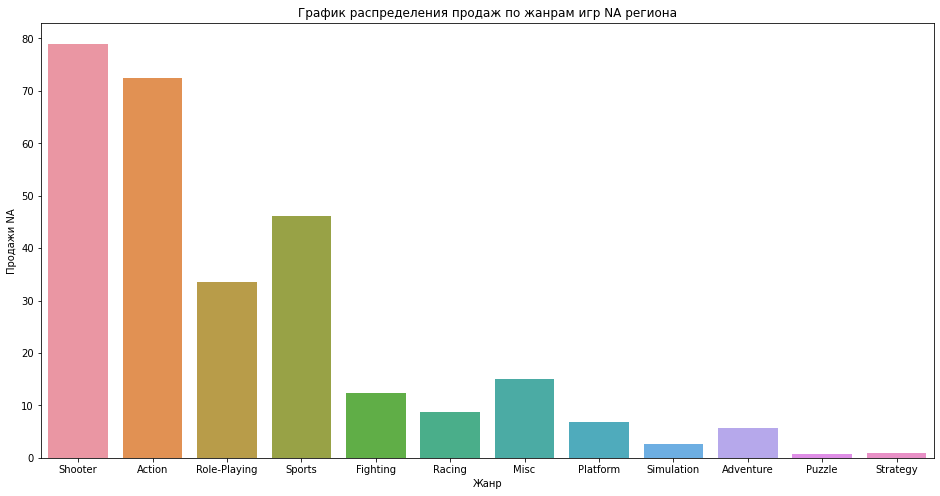

In [84]:
plt.figure(figsize=(16,8)) 
sb.barplot(y='na_sales', x='genre', ci = None, estimator=sum, data=current_period)
plt.title('График распределения продаж по жанрам игр NA региона')
plt.xlabel('Жанр')
plt.ylabel('Продажи NA')
plt.show() 

#### Европа

In [57]:
genre_eu = current_period.pivot_table(index='genre', values='eu_sales', aggfunc=['count', 'sum'])
genre_eu.columns = ['Количество игр', 'Продажи копий млн.']
display(genre_eu.sort_values(by='Продажи копий млн.', ascending=False).head(5))

,Количество игр,Продажи копий млн.
genre,,
Action,619,74.68
Shooter,128,65.52
Sports,161,45.73
Role-Playing,221,28.17
Racing,69,14.13


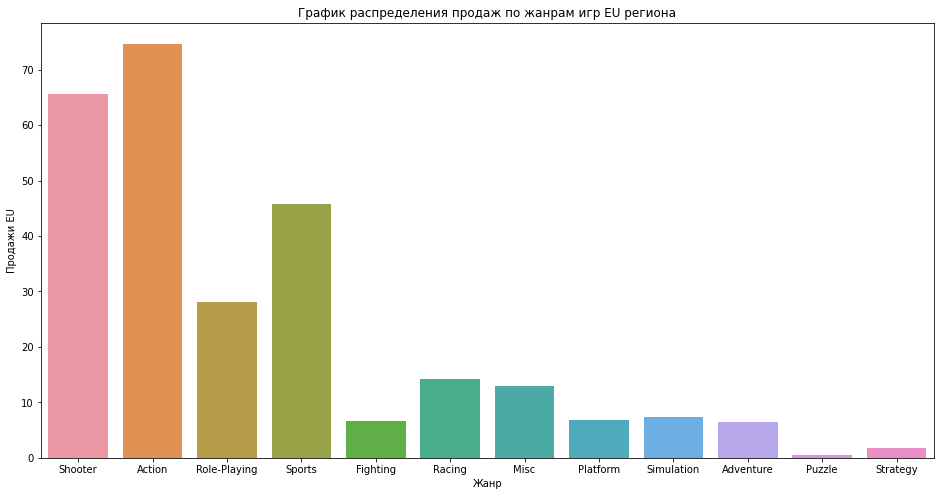

In [85]:
plt.figure(figsize=(16,8)) 
sb.barplot(y='eu_sales', x='genre', ci = None, estimator=sum, data=current_period)
plt.title('График распределения продаж по жанрам игр EU региона')
plt.xlabel('Жанр')
plt.ylabel('Продажи EU')
plt.show() 

#### Япония

In [59]:
genre_jp = current_period.pivot_table(index='genre', values='jp_sales', aggfunc=['count', 'sum'])
genre_jp.columns = ['Количество игр', 'Продажи копий млн.']
display(genre_jp.sort_values(by='Продажи копий млн.', ascending=False).head(5))

,Количество игр,Продажи копий млн.
genre,,
Role-Playing,221,31.16
Action,619,29.58
Fighting,60,6.37
Misc,113,5.61
Shooter,128,4.87


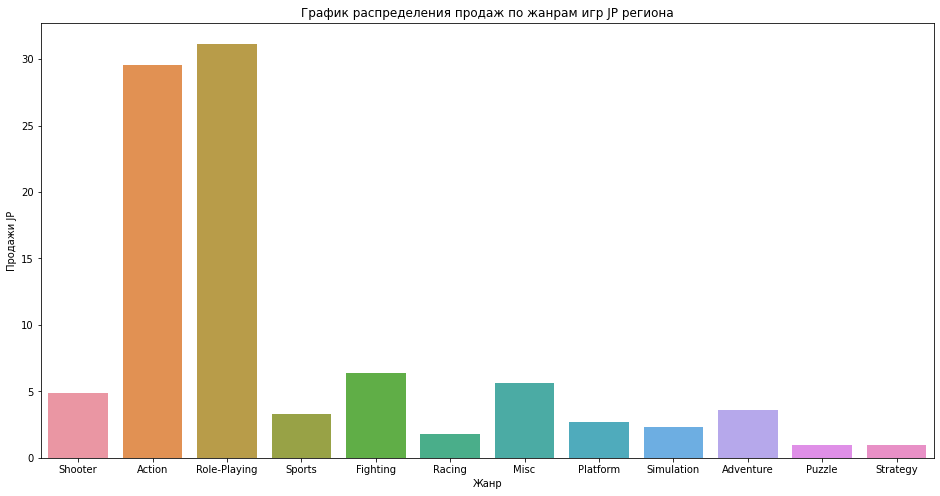

In [86]:
plt.figure(figsize=(16,8)) 
sb.barplot(y='jp_sales', x='genre', ci = None, estimator=sum, data=current_period)
plt.title('График распределения продаж по жанрам игр JP региона')
plt.xlabel('Жанр')
plt.ylabel('Продажи JP')
plt.show() 

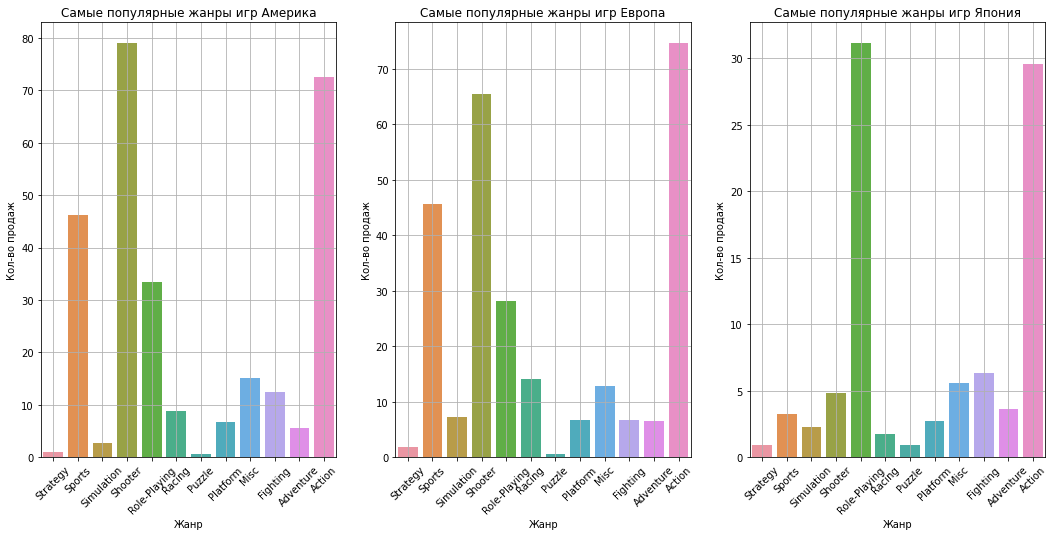

In [61]:
fig, axs = plt.subplots(1, 3, figsize=(18, 8))

sb.barplot(y='na_sales', x='genre', ci = None, estimator=sum, 
           data=current_period.sort_values(by='genre', ascending=False), ax=axs[0])
axs[0].set_title('Самые популярные жанры игр Америка')
axs[0].set_xlabel('Жанр')
axs[0].set_ylabel('Кол-во продаж')
axs[0].grid()
axs[0].tick_params(axis='x', rotation=45)
sb.barplot(y='eu_sales', x='genre', ci = None, estimator=sum, 
           data=current_period.sort_values(by='genre', ascending=False), ax=axs[1])
axs[1].set_title('Самые популярные жанры игр Европа')
axs[1].set_xlabel('Жанр')
axs[1].set_ylabel('Кол-во продаж')
axs[1].grid()
axs[1].tick_params(axis='x', rotation=45)
sb.barplot(y='jp_sales', x='genre', ci = None, estimator=sum, 
           data=current_period.sort_values(by='genre', ascending=False), ax=axs[2])
axs[2].set_xlabel('Жанр')
axs[2].set_ylabel('Кол-во продаж')
axs[2].set_title('Самые популярные жанры игр Япония')
axs[2].grid()
axs[2].tick_params(axis='x', rotation=45)
plt.show()

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px">
    
 **ТОП 5 самых популярных жанров игр в Америке:**
1. Shooter - 79.02 млн. проданных копий
2. Action - 46.25 млн. проданных копий
3. Sports - 25.24 млн. проданных копий
4. Role-Playing - 17.97 млн. проданных копий
5. Misc - 16.12 млн. проданных копий
    
<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px">
    
Наблюдаем, тенденцию этих 5 популярных жанров в Америке   
</div>
    
**ТОП 5 самых популярных жанров игр в Европе:**
1. Action - 74.68 млн. проданных копий
2. Shooter - 65.52 млн. проданных копий
3. Sports - 45.73 млн. проданных копий
4. Role-Playing - 28.17 млн. проданных копий
5. Racing - 14.13 млн. проданных копий

    
<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px">

Топ Европы почти индентичен Америке, но здесь больше любят Racing, чем Misc
</div>
    
**ТОП 5 самых популярных жанров игр в Японии:**
1. Role-Playing - 31.16 млн. проданных копий
2. Action - 29.58 млн. проданных копий
3. Fighting - 6.37 млн. проданных копий
4. Misc - 5.61 млн. проданных копий
5. Shooter - 4.87 млн. проданных копий    
    
<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px">

Рынок же Японии отличается от других. Здесь японцы отдают предпочтение Role-Playing и Action, остальные же в топе значительно меньше продаются    
</div>    
</div>

### Влияние рейтинга ESRB на продажи в отдельном регионе

#### Америка

In [62]:
rating_na = (
    current_period.query('rating != 0')
    .pivot_table(index='rating', values='na_sales', aggfunc=['count', 'sum']))
rating_na.columns = ['Количество игр', 'Продажи копий млн.']
display(rating_na.sort_values(by='Продажи копий млн.', ascending=False).head(5))

,Количество игр,Продажи копий млн.
rating,,
M,265,96.42
Рейтинг отсутствует,749,64.72
E,219,50.74
T,271,38.95
E10+,185,33.23


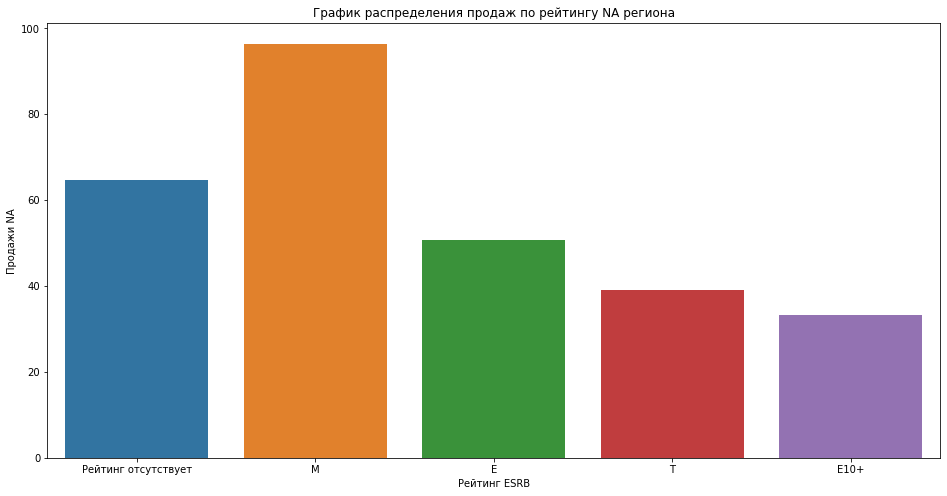

In [87]:
plt.figure(figsize=(16,8)) 
sb.barplot(y='na_sales', x='rating', ci = None, estimator=sum, data=current_period.query('rating != 0'))
plt.title('График распределения продаж по рейтингу NA региона')
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Продажи NA')
plt.show() 

#### Европа

In [64]:
rating_eu = (
    current_period.query('rating != 0')
    .pivot_table(index='rating', values='eu_sales', aggfunc=['count', 'sum']))
rating_eu.columns = ['Количество игр', 'Продажи копий млн.']
display(rating_eu.sort_values(by='Продажи копий млн.', ascending=False).head(5))

,Количество игр,Продажи копий млн.
rating,,
M,265,93.44
Рейтинг отсутствует,749,58.95
E,219,58.06
T,271,34.07
E10+,185,26.16


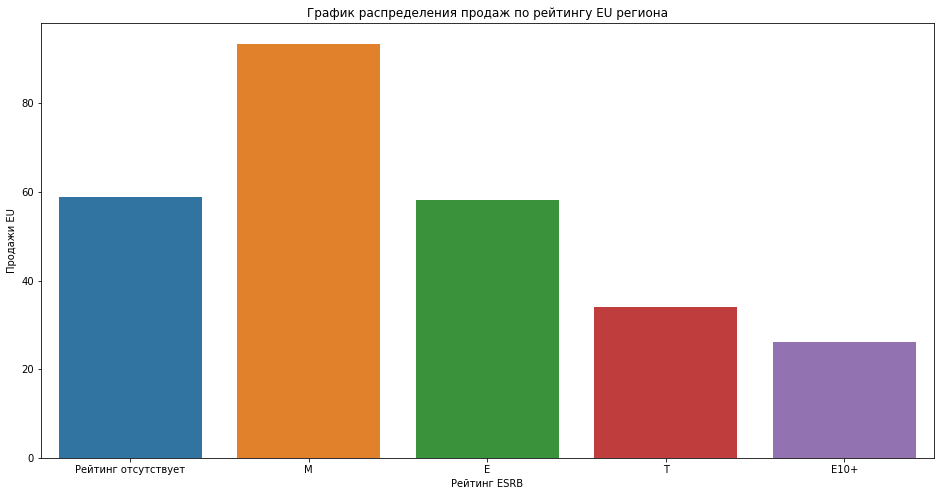

In [88]:
plt.figure(figsize=(16,8)) 
sb.barplot(y='eu_sales', x='rating', ci = None, estimator=sum, data=current_period.query('rating != 0'))
plt.title('График распределения продаж по рейтингу EU региона')
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Продажи EU')
plt.show() 

#### Япония

In [66]:
rating_jp = (
    current_period.query('rating != 0')
    .pivot_table(index='rating', values='jp_sales', aggfunc=['count', 'sum']))
rating_jp.columns = ['Количество игр', 'Продажи копий млн.']
display(rating_jp.sort_values(by='Продажи копий млн.', ascending=False).head(5))

,Количество игр,Продажи копий млн.
rating,,
Рейтинг отсутствует,749,56.90
T,271,14.78
E,219,8.94
M,265,8.01
E10+,185,4.46


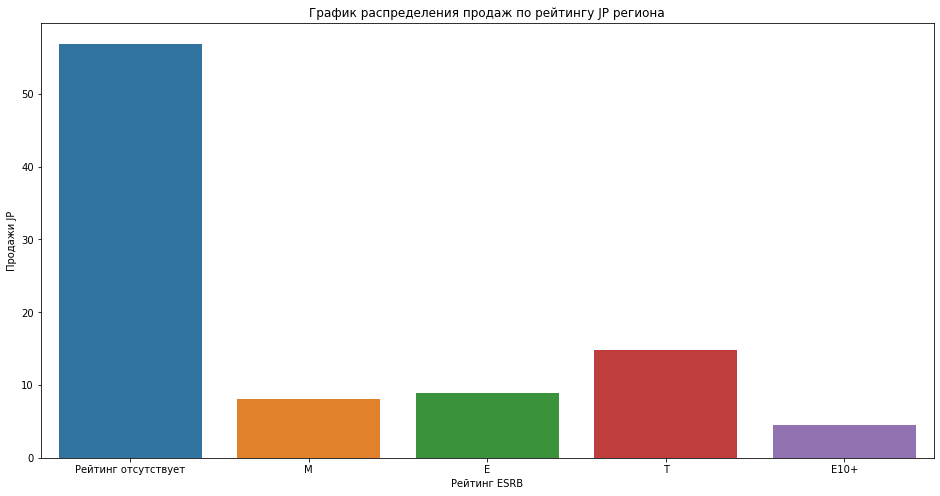

In [89]:
plt.figure(figsize=(16,8)) 
sb.barplot(y='jp_sales', x='rating', ci = None, estimator=sum, data=current_period.query('rating != 0'))
plt.title('График распределения продаж по рейтингу JP региона')
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Продажи JP')
plt.show() 

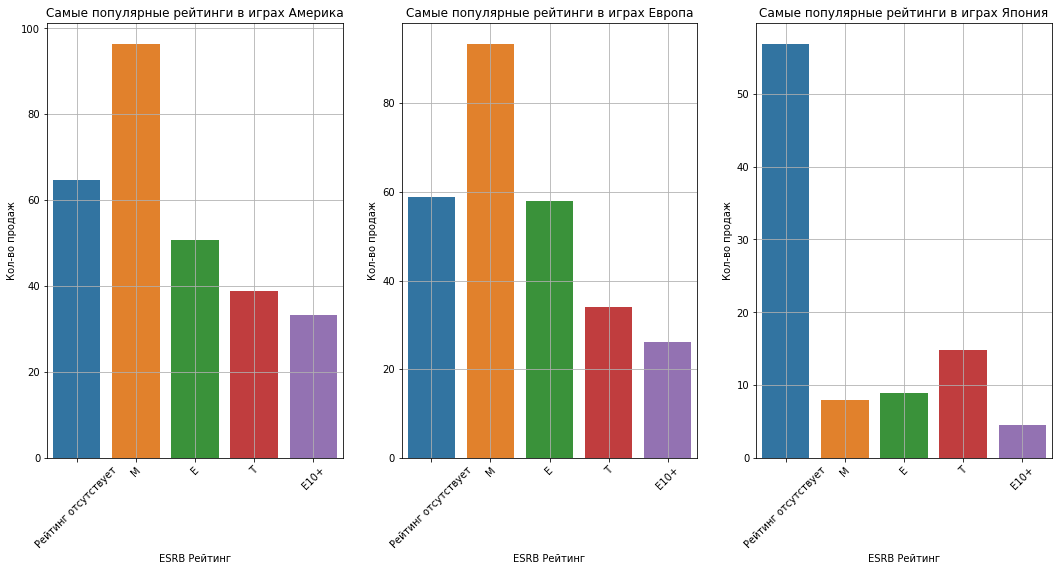

In [68]:
fig, axs = plt.subplots(1, 3, figsize=(18, 8))

sb.barplot(y='na_sales', x='rating', ci = None, estimator=sum, data=current_period, ax=axs[0])
axs[0].set_title('Самые популярные рейтинги в играх Америка')
axs[0].set_xlabel('ESRB Рейтинг')
axs[0].set_ylabel('Кол-во продаж')
axs[0].grid()
axs[0].tick_params(axis='x', rotation=45)
sb.barplot(y='eu_sales', x='rating', ci = None, estimator=sum, data=current_period, ax=axs[1])
axs[1].set_title('Самые популярные рейтинги в играх Европа')
axs[1].set_xlabel('ESRB Рейтинг')
axs[1].set_ylabel('Кол-во продаж')
axs[1].grid()
axs[1].tick_params(axis='x', rotation=45)
sb.barplot(y='jp_sales', x='rating', ci = None, estimator=sum, data=current_period, ax=axs[2])
axs[2].set_xlabel('ESRB Рейтинг')
axs[2].set_ylabel('Кол-во продаж')
axs[2].set_title('Самые популярные рейтинги в играх Япония')
axs[2].grid()
axs[2].tick_params(axis='x', rotation=45)
plt.show()

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px">

Портрет пользователя по возрасту Америки очень схож с Европейским. В этих регионах особой популярностью пользуются игры для взрослых (M) и игры для людей от 6+ лет (E). Также получилось много значений NaN в обоих регионах, это связано, что в Европе есть и свой рейтинг для игр PEGI, но также там могут быть и другие, а в Америке также присутсвуют рейтинги других организаций на зарубежные игры

В Японии же картина другая, здесь популярностью пользуются игры для подростков 13+ (T) и игры для людей 6+ (E), а только потом для взрослых (M), значения NaN связаны с играми использующие скорее всего систему возрастных ограничений CERO или другие организаци
    
</div>

### Итоговый портрет пользователей по регионам

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px">

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px">
    
**Пользователи Американского региона предпочитают больше играть:**
- на платформах PS4, XOne, X360
- в игры жанра Shooter, Action, Sports
- с рейтингом ESRB M» («Mature») и «E» («Everyone»)
</div>

<br> 
<br>      
<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px">    
    
**Пользователи Европейского региона предпочитают больше играть:**
- на платформах PS4, XOne, PS3
- в игры жанра Action, Shooter, Sports
- с рейтингом ESRB M» («Mature») и «E» («Everyone»)
  
*Вкусы европейцев очень похожи на американские*
</div>    


<br> 
<br>      
<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px">
    
**Пользователи Японского региона предпочитают больше играть:**
- на платформах 3DS, PSV, PS4
- в игры жанра Role-Playing, Action, Fighting
- с рейтингом ESRB «E» («Everyone»), «T» («Teen») и «M» («Mature»)
</div>
 
    
Японии в край отличается от других регионов, предположения кроется в высоком ритме жизни в Японии из-за чего, удобно было бы купить мобильную консоль, не зря у них высокие продажи. Также особенность игр у этих консолей кроется в том, что чаще всего игры таких жанров выпускаются на них и многие игры имеют рейтинг детских и подростковых, но это не значит, что взрослые не могут играть или им будет не интересно
</div>
</div>

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Для проверки данной гипотезы, необходимо воспользоваться критерием Стьюдента, который чаще всего применяется для проверки равенства средних значений в двух выборках.
Тип альтернативной гипотезы будет двусторонним.

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px">
    
**Нулевая гипотеза H₀:** Средние пользовательские рейтинги платформ Xbox One и PC **равны**

**Альтернативная гипотеза H₁:** Средние пользовательские рейтинги платформ Xbox One и PC **не равны**

*α* = **5**% - уровень значимости
</div>

In [69]:
# сделаем выборки по платформе и уберём из них значения, где нет рейтинга
user_score_pc = current_period.query('platform == "PC" and user_score != 0')['user_score']
user_score_xone = current_period.query('platform == "XOne" and user_score != 0')['user_score']

In [70]:
user_score_pc.std() # просмотрим дисперсию

1.703277521466614

In [71]:
user_score_xone.std() # просмотрим дисперсию

1.3751387755003852

Проверим гипотезу, использую ttest_ind - которая вычисляет **уровень значимости критерия Стьюдента** для двух независимых выборок. Из-за того, что дисперсии сильно отличаются применим параметр equal_var=False

In [72]:
# зададим переменной уровень значимости
alpha = 0.05
# так как видим, что дисперсии у нас не равны, применим параметр equal_var=False)
results = st.ttest_ind(user_score_pc, user_score_xone, equal_var = False)

print('p_value равно ', results.pvalue)

if(results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p_value равно  0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px">
    
Значение p-value равняется 11.6%, что не удовлетворяет условию нулевой гипотезы и мы не можем ее отвергнуть. Таким образом с вероятностью 11.6% мы можем получить не одинаковые рейтинги
</div>

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

Для проверки данной гипотезы, необходимо воспользоваться критерием Стьюдента, который чаще всего применяется для проверки равенства средних значений в двух выборках.
Тип альтернативной гипотезы будет двусторонним.

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px">
    
**Нулевая гипотеза H₀:** Cредние пользовательские рейтинги жанров Action и Sports **равны**

**Альтернативная гипотеза H₁:** Cредние пользовательские рейтинги жанров Action и Sports **не равны**

*α* = **5**% - уровень значимости
</div>

In [73]:
# сделаем выборки по жанру и уберём из них значения, где нет рейтинга
genre_action = current_period.query('genre == "Action" and user_score != 0')['user_score']
genre_sports = current_period.query('genre == "Sports" and user_score != 0')['user_score']

In [74]:
genre_action.std()

1.377852190358842

In [75]:
genre_sports.std()

1.8566041925001266

Проверим гипотезу, использую ttest_ind - которая вычисляет **уровень значимости критерия Стьюдента** для двух независимых выборок. Из-за того, что дисперсии сильно отличаются применим параметр equal_var=False

In [76]:
# зададим переменной уровень значимости
alpha = 0.05

# так как видим, что дисперсии у нас не равны, применим параметр equal_var=False
results = st.ttest_ind(genre_action, genre_sports, equal_var = False)

# выведим результат p-value
print('p_value равно ', results.pvalue) 

# проверим отвержение нулевой гипотезы
if(results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p_value равно  1.1825550382644557e-14
Отвергаем нулевую гипотезу


<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px">
    
Получив такой p-value, пришлось отвергнуть нулевую гипотезу. Таким образом маловероятно, что мы сможем получить одинаковые рейтинги жанров
</div>

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px">
    
**Итог проверки гипотез:**
- Средние пользовательские рейтинги платформ PS4 и PC разные на 11.6%. Нулевую гипотезу не удалось отвергнуть
- Средние пользовательские рейтинги жанров Action и Sports разные. Нулевую гипотезу удалось отвергнуть

## Общий вывод

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px">

1. **Открыли файл и изучили данные**
- обнаружили пропуски в колонках year_of_release, critic_score, user_score, rating, genre, name
- обнаружили проблемы в названиях колонок, их нужно привести в соответствие стилю
- обнаружили неподходящий тип данных в колонках
- явные дубликаты не были обнаружены 
- построили гистограммы по данным
- определили рейтинг ESRB
2. **Провели предобработку данных**
- привели названия колонок к нижнему регистру 
- обработали пропуски и изменили тип данных, где это считалось нужным
- определили значение tbd - to be determined и изменили его
- создали новую колонку общих продаж регионов
3. **Провели исследовательский анализ**
- сколько игр выпускалось в разные годы
- сколько было продаж у платформ 
- выяснили потенциально прибыльные платформы
- выяснили влияние на продажи внутри одной платформы
- соотнесли выводы влияния продаж игр с другими популярными платформами
- сделали общее распределение по жанрам и выявили прибыльные
4. **Составили портрет пользователя каждого региона**
- выявили самые популярные платформы по регионам (NA, EU, JP)
- выявили самые популярные жанры по регионам (NA, EU, JP)
- определили влияние рейтинга ESRB на продажи по регионам (NA, EU, JP)
- на основе данных составили портрет пользователя каждого региона
5. **Проверили гипотезы**
- проверили гипотезу, что «средние пользовательские рейтинги платформ Xbox One и PC одинаковые»
- проверили гипотезу, что «средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные»


**Целью исследования было:** 
- выявить определяющие успешность игры закономерности
- определить популярный продукт и спланировать рекламные компании на 2017 год

<br>
<br>

**Выявили такие успешные закономерности игр:**

- в среднем платформы живут в течение 8-12 лет, поэтому логично, что выпускать игры к примерному концу жизни платформ чревато малыми продажами 
- потенциально прибылыльными платформами являются платформы нового поколения, ибо мир видеоигр меняется каждый раз. Всё больше и больше делают ставку на графику, физику и оптимизацию, тем самым игр становится меньше, ибо время на их создание уходит больше, поэтому после 2011 года мы видим начало спада количества игр
- самые популярными по прибыли игры являются shooter, action, role-playing и sports. Интересно, что игры этих жанров  всё чаще делают в возможностью игры по сети - это вероятная из причин таких высоких продаж

<br>
<br>

**Определили популярные продукты и спланировали рекламные компании на 2017:**

1. Определили, что наиболее популярными продуктами будут игры на PS4, XOne, но не стоит и оставлять без внимания японский рынок, где большой долей обладают портативные платформы 3DS и PSV


2. При планировании рекламной компании на 2017 год будем руководстоваться:
- популярными платформами, если в Америке и Европе реклама будет выглядеть практически одиноково, то в Японии будут широко рекламироваться портативные устройства
- жанром игр, в Америке и Европе активно стоит рекламировать shooter, action, sports и role-playing, то в Японии action и role-playing
- рейтинг возраста, в Америке и Европе стоит рекламировать чаще игры **M** рейтинга, так как в таких играх сняты все ограничения цензуры, и **E** рейтинга, так как они предназначены для всех. В Японии же сделать упор на игры для подростков - **T** рейтинга. Отличие таких рейтингов от запада скорее всего является жёсткой цензурой в Японии.

<br>
<br>
<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid orange 2px; padding: 20px">    
    
**Рекомендации разработчикам:**

- Исправить алгоритмы рейтинга, чтобы у игр, где нет рейтинга отображалось tbd
- Исправить формат заполняемых полей
</div>
</div>